In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Tanjiaalam/carbon/main/data_cleanednew.csv")
df

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,co2_per_cap
0,AGO,1/1/1991,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06,0.409949
1,ARE,1/1/1991,1594.0,0.076475,245.977706,12262.388130,57010.849,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06,29.851550
2,ARG,1/1/1991,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,1.900000e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07,3.536073
3,AUS,1/1/1991,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,3.300000e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07,16.288490
4,AUT,1/1/1991,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,1.720000e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06,8.448456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,VNM,1/1/2008,5064.2,10.611056,266.177197,694.872260,127384.246,573.242319,12.016197,6.166789,9.027376e+10,920.0,25.2,1.064356,85122300.0,2.803530,2.369805e+07,1.496485
1696,YEM,1/1/2008,939.1,5.775544,142.167696,320.226397,23384.459,458.830121,9.356326,0.520661,2.691736e+10,970.0,81.1,3.049598,22626595.0,4.960694,6.932789e+06,1.033494
1697,ZAF,1/1/2008,4055.3,3.503662,320.191040,3074.597450,435877.955,930.310881,33.234023,6.859550,2.750000e+11,5860.0,65.6,1.104057,48793022.0,1.897450,2.963688e+07,8.933203
1698,ZAR,1/1/2008,771.5,14.798970,1193.887219,356.023405,2816.256,151.165020,17.352516,9.986567,1.166838e+10,160.0,174.4,2.763286,62474901.0,4.605834,2.121648e+07,0.045078


In [ ]:
X = df.drop("co2_per_cap", axis=1)
y = df["co2_per_cap"]

In [ ]:
X = pd.get_dummies(df["country"], prefix="country")

# Extract the year from the date and store it as a new column
X["year"] = pd.to_datetime(df["year"]).dt.year


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as Imputer

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

imputer = Imputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2  = r2_score(y_test, y_pred)
mse, mae, r2

Root Mean Squared Error: 0.6062816901610059


(0.36757748782448596, 0.3580753671424019, 0.984212731187164)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


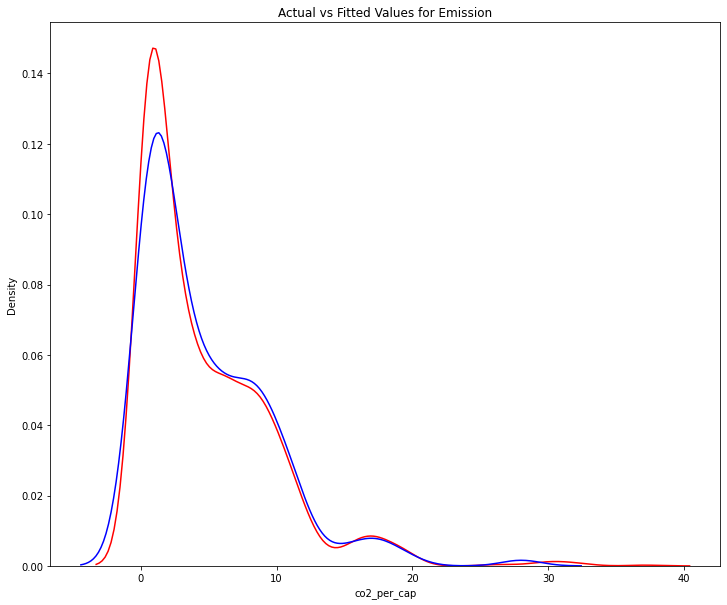

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Emission')


plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

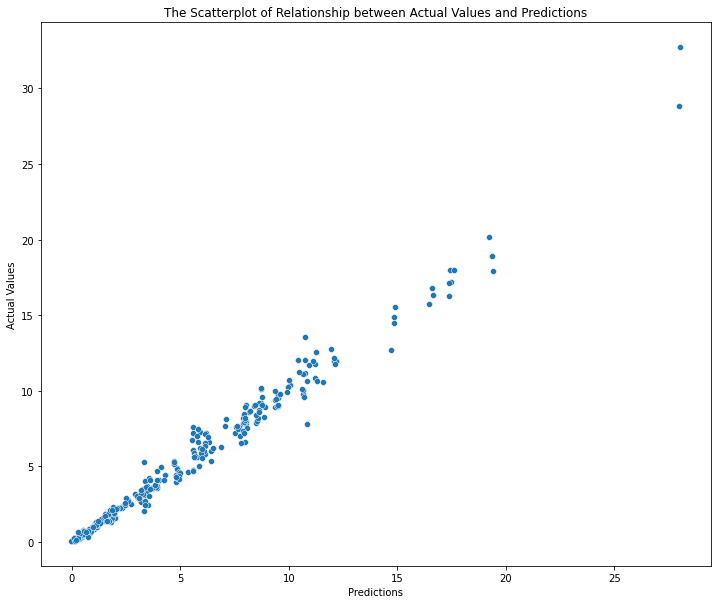

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(y_pred,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_rf_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_rf_pred)
mse = mean_squared_error(y_test, y_rf_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred)))
r2  = r2_score(y_test,y_rf_pred )
mse, mae, r2

Root Mean Squared Error: 0.36040975690880805


(0.12989519287506612, 0.18629040362105906, 0.9944210665904735)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


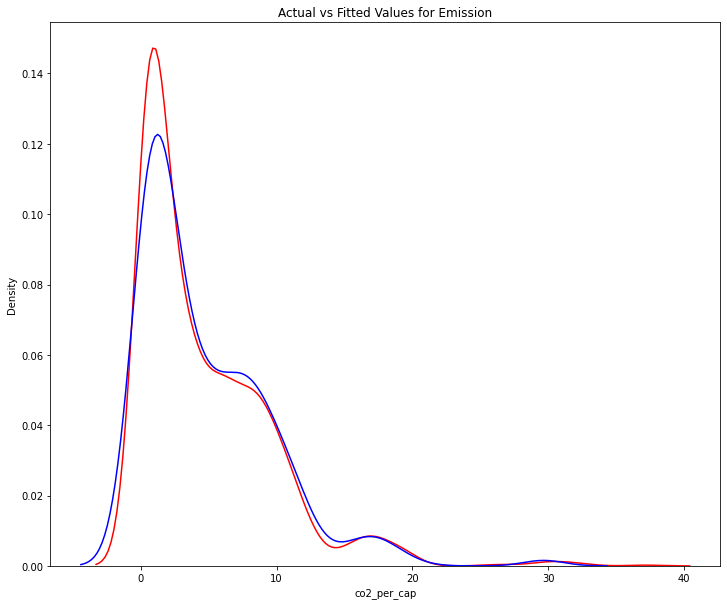

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Emission')


plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

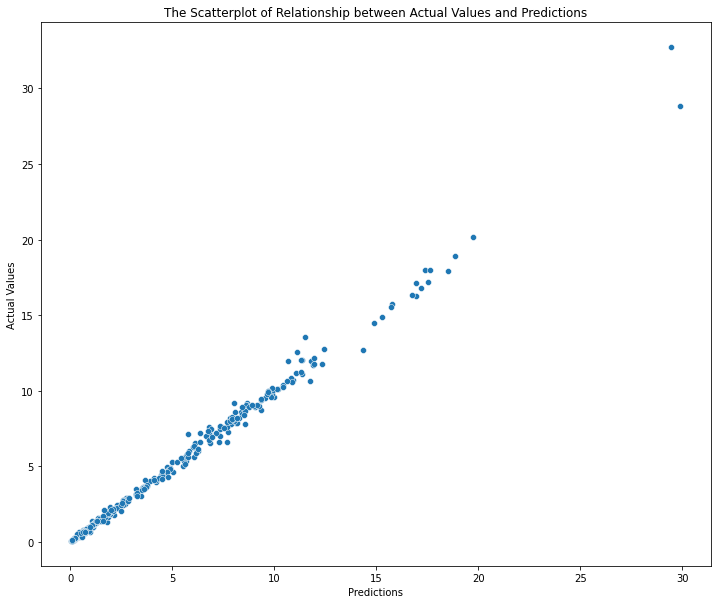

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(y_rf_pred,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 30)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [ ]:
dtr_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, dtr_pred)
mse = mean_squared_error(y_test, dtr_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dtr_pred )))

r2  = r2_score(y_test,dtr_pred)
mse, mae, r2

Root Mean Squared Error: 0.37499384380152523


(0.1406203828890427, 0.21095054815588238, 0.9939604250565712)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


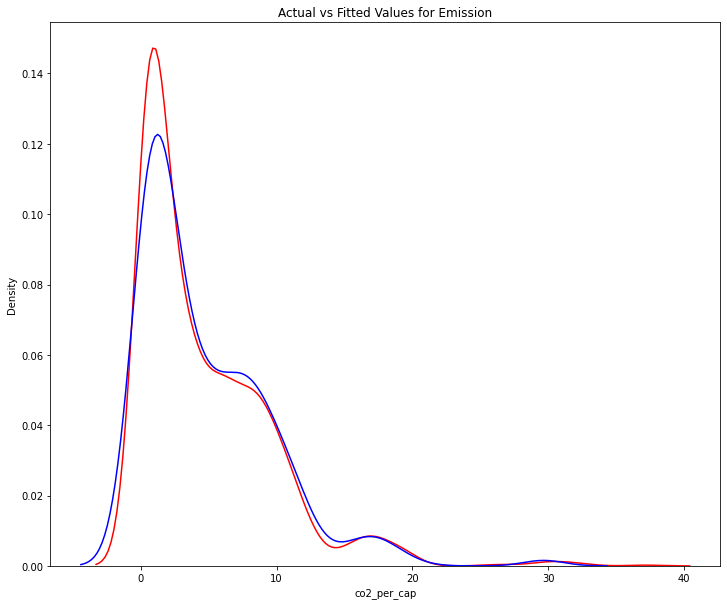

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Emission')


plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

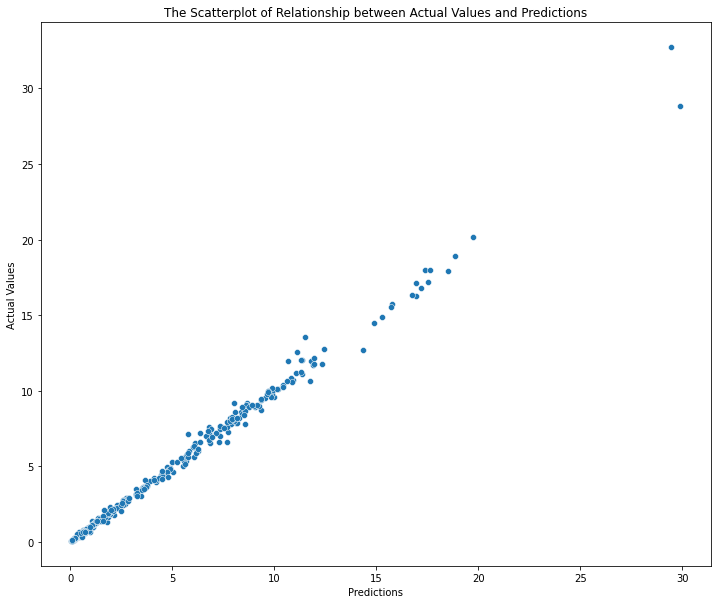

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(y_rf_pred,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
prediction = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction )))
r2  = r2_score(y_test, prediction)
mse, mae, r2

Root Mean Squared Error: 0.6062640600969682


(0.36755611056526033, 0.3587608615478324, 0.98421364932973)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


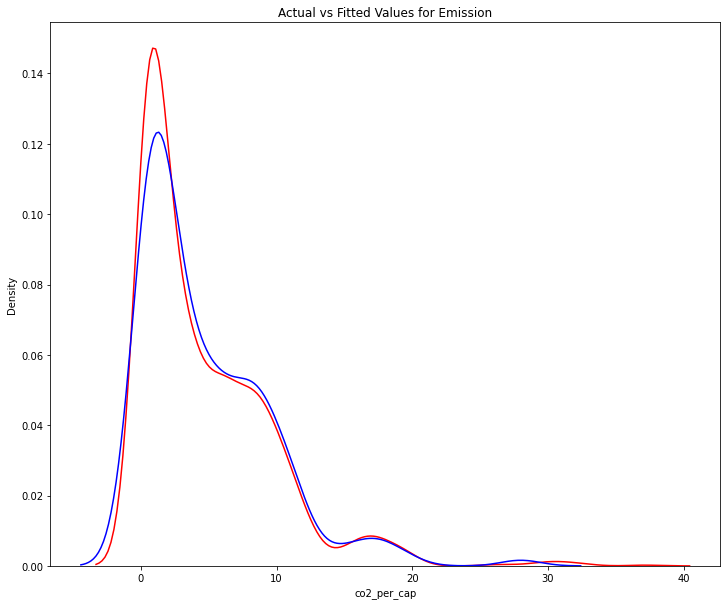

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Emission')

plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

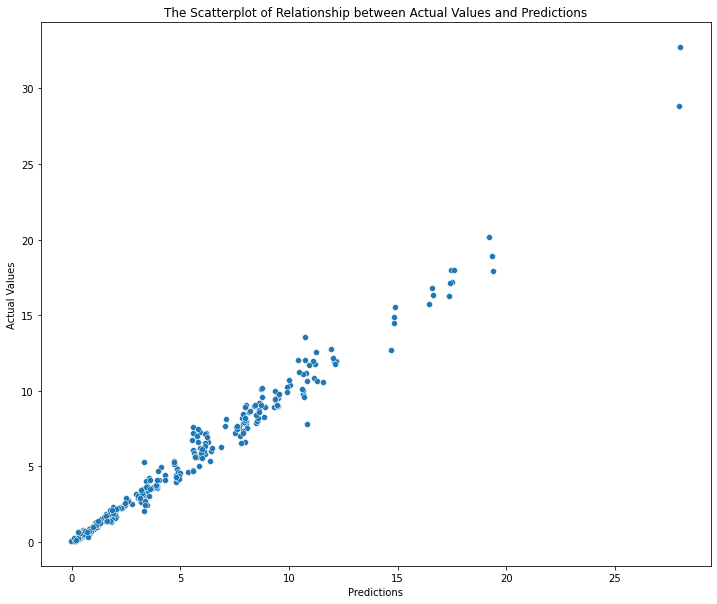

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(prediction,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100,max_depth=3, learning_rate=1.0)
est.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0)

In [ ]:
prediction = est.predict(X_test)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction )))
r2  = r2_score(y_test, prediction)
mse, mae, r2

Root Mean Squared Error: 0.4065185473952058


(0.1652573293763082, 0.23582019510181304, 0.9929022805569614)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


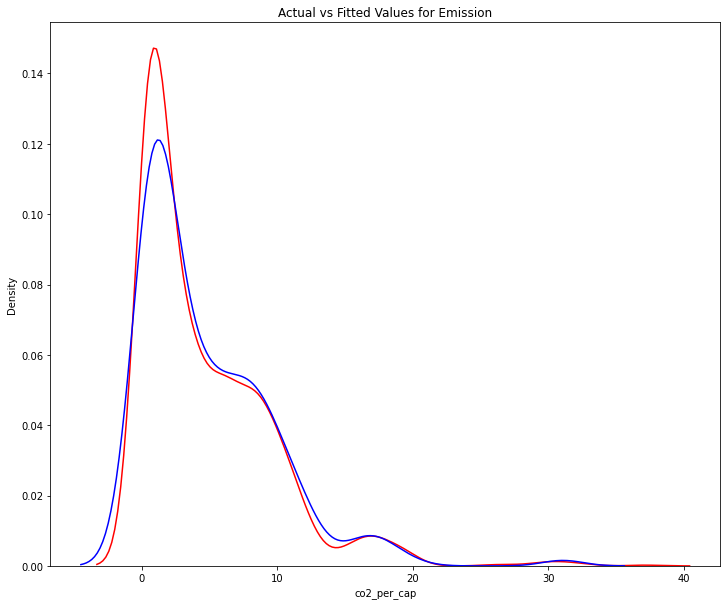

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Emission')

plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

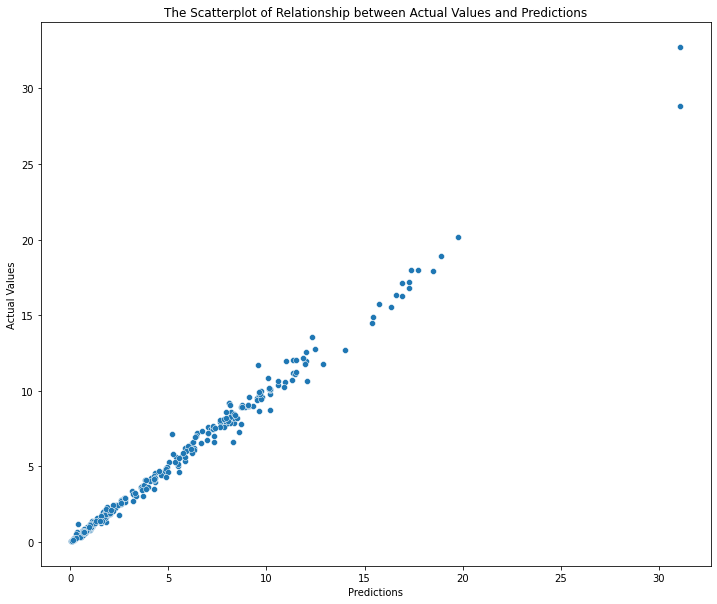

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(prediction,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                     n_estimators = 10, seed =30)
xgb_r.fit(X_train, y_train)
dtr_pred = xgb_r.predict(X_test)
mae = mean_absolute_error(y_test, dtr_pred)
mse = mean_squared_error(y_test, dtr_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dtr_pred )))
r2  = r2_score(y_test,dtr_pred)
mse, mae, r2

[12:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 4.3010359370473825


(18.498910131773055, 3.347415243325491, 0.20548108448293645)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


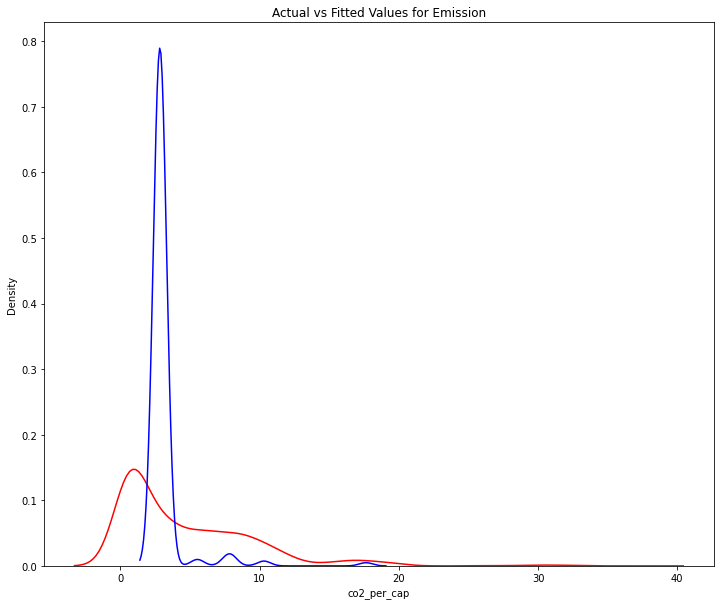

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(dtr_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Emission')

plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

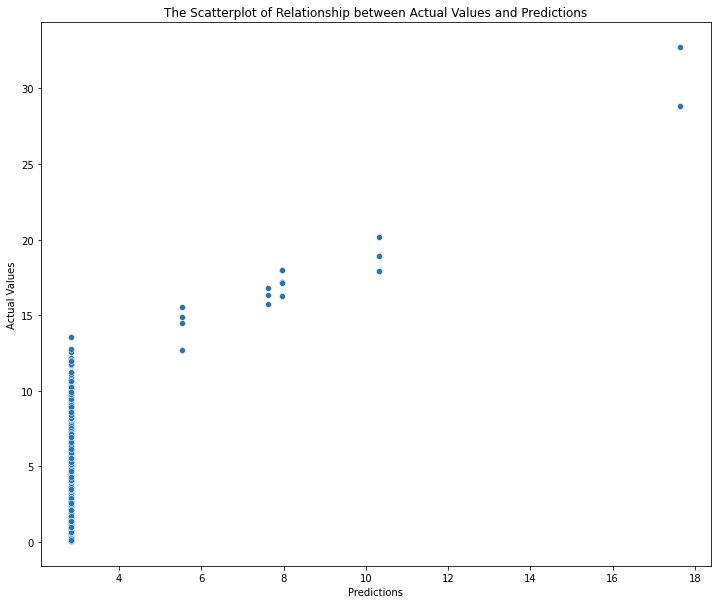

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(dtr_pred,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")